<a href="https://colab.research.google.com/github/desaraju02/deep-learning-1/blob/main/CCN_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import zipfile
import tensorflow as tf


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-08-24 13:01:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  86.8MB/s    in 1.2s    

2025-08-24 13:01:39 (86.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# This is from Food101 data set from Kaggle. Modified to use only 2 classes Pizza and Steak.

In [4]:
!ls pizza_steak/

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [7]:
import os

# list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [8]:
num_steam_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steam_images_train

750

In [9]:
# Visualize the images, first lets get the class names programmatically

In [10]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
# Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image Shape {img.shape}")
  return img

Image Shape (512, 512, 3)


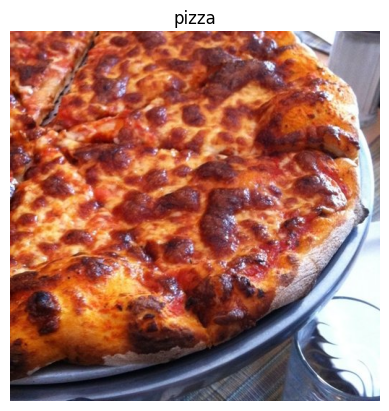

In [12]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [13]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[201,  91,  78],
        [198,  88,  75],
        [195,  87,  75],
        ...,
        [ 54,  50,  65],
        [ 54,  50,  65],
        [ 53,  49,  64]],

       [[198,  91,  75],
        [191,  84,  68],
        [184,  78,  64],
        ...,
        [ 57,  53,  68],
        [ 58,  54,  69],
        [ 59,  55,  70]],

       [[177,  75,  52],
        [172,  70,  47],
        [167,  65,  43],
        ...,
        [ 56,  52,  67],
        [ 55,  51,  66],
        [ 55,  51,  66]],

       ...,

       [[ 47,  48,  66],
        [ 47,  48,  66],
        [ 47,  48,  66],
        ...,
        [ 65,  80, 119],
        [ 60,  75, 116],
        [ 55,  73, 113]],

       [[ 53,  54,  74],
        [ 56,  57,  77],
        [ 55,  56,  76],
        ...,
        [ 64,  79, 118],
        [ 67,  82, 123],
        [ 67,  82, 125]],

       [[ 71,  72,  92],
        [ 77,  78,  98],
        [ 75,  76,  96],
        ...,
        [ 68,  82, 12

In [14]:
# get all pixel values between 0 and 1
img = img / 255.
img

array([[[0.78823529, 0.35686275, 0.30588235],
        [0.77647059, 0.34509804, 0.29411765],
        [0.76470588, 0.34117647, 0.29411765],
        ...,
        [0.21176471, 0.19607843, 0.25490196],
        [0.21176471, 0.19607843, 0.25490196],
        [0.20784314, 0.19215686, 0.25098039]],

       [[0.77647059, 0.35686275, 0.29411765],
        [0.74901961, 0.32941176, 0.26666667],
        [0.72156863, 0.30588235, 0.25098039],
        ...,
        [0.22352941, 0.20784314, 0.26666667],
        [0.22745098, 0.21176471, 0.27058824],
        [0.23137255, 0.21568627, 0.2745098 ]],

       [[0.69411765, 0.29411765, 0.20392157],
        [0.6745098 , 0.2745098 , 0.18431373],
        [0.65490196, 0.25490196, 0.16862745],
        ...,
        [0.21960784, 0.20392157, 0.2627451 ],
        [0.21568627, 0.2       , 0.25882353],
        [0.21568627, 0.2       , 0.25882353]],

       ...,

       [[0.18431373, 0.18823529, 0.25882353],
        [0.18431373, 0.18823529, 0.25882353],
        [0.18431373, 0

# End to End example


*   Load Images
*   Preprocess Images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
tf.random.set_seed(42)

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# set up path to data directory
train_dir = "/content/pizza_steak/train/"
test_dir = "/content/pizza_steak/test/"

In [19]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.


In [20]:
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

Found 500 images belonging to 2 classes.


In [21]:
# Build a CNN Model

In [22]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - accuracy: 0.5406 - loss: 0.6821 - val_accuracy: 0.7460 - val_loss: 0.4979
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7793 - loss: 0.4866 - val_accuracy: 0.8180 - val_loss: 0.3976
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.7993 - loss: 0.4394 - val_accuracy: 0.8540 - val_loss: 0.3236
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8305 - loss: 0.3853 - val_accuracy: 0.8580 - val_loss: 0.3446
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8730 - loss: 0.3333 - val_accuracy: 0.8700 - val_loss: 0.2994
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8818 - loss: 0.3033 - val_accuracy: 0.8180 - val_loss: 0.3665
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9024 - loss: 0.2748 - val_accuracy: 0.8560 - val_loss: 0.3478
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8957 - loss: 0.2673 - val_accuracy: 0.8680 - v

In [24]:
# Create a model to replicate the TensorFlow Playground Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.4826 - loss: 1.8594 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.4822 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [25]:
# Create a model to replicate the TensorFlow Playground Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.5560 - loss: 4.9725 - val_accuracy: 0.7200 - val_loss: 0.5810
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7177 - loss: 0.6299 - val_accuracy: 0.5220 - val_loss: 1.8047
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6639 - loss: 0.9202 - val_accuracy: 0.7680 - val_loss: 0.4934
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7510 - loss: 0.5547 - val_accuracy: 0.6080 - val_loss: 0.8685
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7089 - loss: 0.6038 - val_accuracy: 0.7700 - val_loss: 0.5528


# 1. Become one with the data

Image Shape (512, 512, 3)
Image Shape (384, 512, 3)


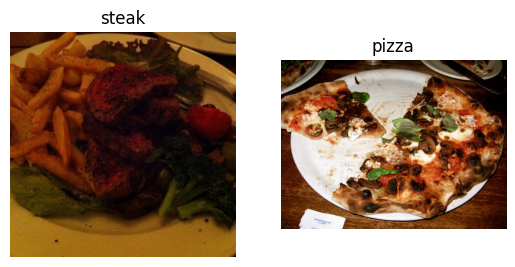

In [30]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")
plt.subplot(1,2,2)
pizza_img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

## 2. Preprocess the data

In [ ]:
# Define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [31]:
# Our next step is to turn our data into batches
!nvidia-smi

Sun Aug 24 13:18:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             33W /   70W |    1178MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# create train and test data generators and rescale the data


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [33]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [37]:
# Get a sample of the training data batch
images, labels = train_data.__next__()
len(images), len(labels)

(32, 32)

In [39]:
# How many batches are there
len(train_data), len(test_data)

(47, 16)

In [40]:
images[6]

array([[[0.8431373 , 0.6431373 , 0.41960788],
        [0.8431373 , 0.6431373 , 0.41960788],
        [0.85098046, 0.64705884, 0.42352945],
        ...,
        [0.9215687 , 0.6862745 , 0.40000004],
        [0.9215687 , 0.6784314 , 0.37647063],
        [0.92549026, 0.6862745 , 0.37254903]],

       [[0.854902  , 0.6509804 , 0.42352945],
        [0.86666673, 0.6627451 , 0.43529415],
        [0.8941177 , 0.6784314 , 0.454902  ],
        ...,
        [0.9333334 , 0.6901961 , 0.39607847],
        [0.92549026, 0.6862745 , 0.37254903],
        [0.9215687 , 0.68235296, 0.3647059 ]],

       [[0.86666673, 0.64705884, 0.40784317],
        [0.882353  , 0.6627451 , 0.43137258],
        [0.909804  , 0.6901961 , 0.45882356],
        ...,
        [0.8941177 , 0.64705884, 0.36862746],
        [0.8980393 , 0.654902  , 0.36078432],
        [0.9058824 , 0.6627451 , 0.36078432]],

       ...,

       [[0.48627454, 0.21960786, 0.08235294],
        [0.47450984, 0.20392159, 0.07450981],
        [0.48235297, 0

In [41]:
images[6].shape

(224, 224, 3)

In [42]:
labels

array([1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [43]:
labels.shape

(32,)

# 3. Creat a CNN Model

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [45]:
# Create teh model
model_4 = Sequential([
    Conv2D(10, 3, strides = 1, padding='valid', activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, strides = 1, padding='valid', activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, strides = 1, padding='valid', activation="relu", input_shape=(224, 224, 3)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
